In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon

## GeoDataFrame

In [ ]:
d = {'col1':['A', 'B'], 'geometry':[Point(0, 1), Point(1, 0)]}
gdf = gpd.GeoDataFrame(d)
gdf

,col1,geometry
0,A,POINT (0.00000 1.00000)
1,B,POINT (1.00000 0.00000)


In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# 位置の座標
gdf.geometry.x

0    0.0
1    1.0
dtype: float64

In [ ]:
gdf.geometry.y

0    1.0
1    0.0
dtype: float64

### LineString

In [ ]:
d = {'col1':['A', 'B'], 'geometry':[LineString([(0, 1), (1,0)]), LineString([(2, 0), (2, 2)])]}
gdf = gpd.GeoDataFrame(d)
gdf

,col1,geometry
0,A,"LINESTRING (0.00000 1.00000, 1.00000 0.00000)"
1,B,"LINESTRING (2.00000 0.00000, 2.00000 2.00000)"


<AxesSubplot:>

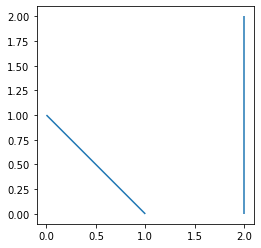

In [ ]:
gdf.plot()

In [ ]:
#geom_type
gdf.geom_type

0    LineString
1    LineString
dtype: object

## 外部データ

In [ ]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [ ]:
data_path = gpd.datasets.get_path('naturalearth_lowres')
data_path

'/opt/conda/lib/python3.9/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp'

In [ ]:
gdf1 = gpd.read_file(data_path)
gdf1

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

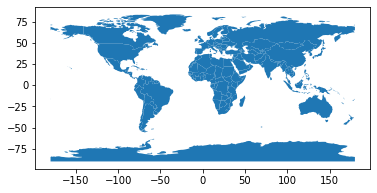

In [ ]:
gdf1.plot()

In [ ]:
data_path = gpd.datasets.get_path('naturalearth_cities')
gdf2 = gpd.read_file(data_path)
gdf2

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


<AxesSubplot:>

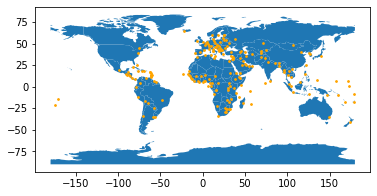

In [ ]:
ax = gdf1.plot()
gdf2.plot(ax=ax, color='orange', markersize=3)

## ダウンロードしたシェープファイルの読み込み

In [ ]:
gdf = gpd.read_file('./data/train/N02-19_RailroadSection.shp', encoding='shift-jis')
gdf

,N02_001,N02_002,N02_003,N02_004,geometry
0,23,5,沖縄都市モノレール線,沖縄都市モノレール,"LINESTRING (127.67948 26.21454, 127.67970 26.2..."
1,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29139 40.33740, 141.29176 40.3..."
2,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.27554 40.23936, 141.27567 40.2..."
3,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.28659 40.26092, 141.28538 40.2..."
4,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29082 40.28615, 141.29089 40.2..."
...,...,...,...,...,...
22011,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.58522 35.48055, 139.58384 35.4..."
22012,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.56671 35.47802, 139.56433 35.4..."
22013,11,2,おおさか東線,西日本旅客鉄道,"LINESTRING (135.56227 34.68802, 135.56400 34.6..."
22014,11,2,東海道線,東日本旅客鉄道,"LINESTRING (139.66375 35.57335, 139.66382 35.5..."


<AxesSubplot:>

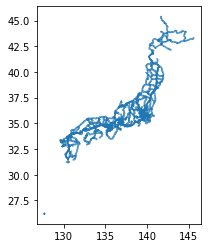

In [ ]:
gdf.plot()

In [ ]:
gdf = gpd.read_file('./data/train/N02-19_RailroadSection.geojson', encoding='shift-jis')

In [ ]:
gdf

,鉄道区分,事業者種別,路線名,運営会社,geometry
0,23,5,沖縄都市モノレール線,沖縄都市モノレール,"LINESTRING (127.67948 26.21454, 127.67970 26.2..."
1,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29139 40.33740, 141.29176 40.3..."
2,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.27554 40.23936, 141.27567 40.2..."
3,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.28659 40.26092, 141.28538 40.2..."
4,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29082 40.28615, 141.29089 40.2..."
...,...,...,...,...,...
22011,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.58522 35.48055, 139.58384 35.4..."
22012,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.56671 35.47802, 139.56433 35.4..."
22013,11,2,おおさか東線,西日本旅客鉄道,"LINESTRING (135.56227 34.68802, 135.56400 34.6..."
22014,11,2,東海道線,東日本旅客鉄道,"LINESTRING (139.66375 35.57335, 139.66382 35.5..."


<AxesSubplot:>

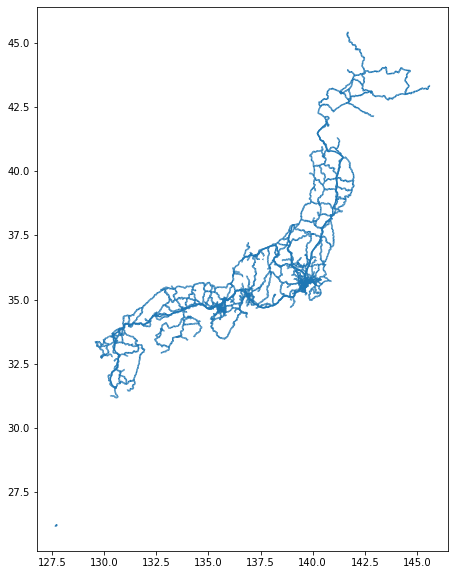

In [ ]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(1,1,1)
gdf.plot(ax=ax)

## 練習：山手線をプロット

In [ ]:
gdf

,鉄道区分,事業者種別,路線名,運営会社,geometry
0,23,5,沖縄都市モノレール線,沖縄都市モノレール,"LINESTRING (127.67948 26.21454, 127.67970 26.2..."
1,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29139 40.33740, 141.29176 40.3..."
2,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.27554 40.23936, 141.27567 40.2..."
3,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.28659 40.26092, 141.28538 40.2..."
4,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29082 40.28615, 141.29089 40.2..."
...,...,...,...,...,...
22011,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.58522 35.48055, 139.58384 35.4..."
22012,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.56671 35.47802, 139.56433 35.4..."
22013,11,2,おおさか東線,西日本旅客鉄道,"LINESTRING (135.56227 34.68802, 135.56400 34.6..."
22014,11,2,東海道線,東日本旅客鉄道,"LINESTRING (139.66375 35.57335, 139.66382 35.5..."


In [ ]:
gdf['路線名'].unique()

array(['沖縄都市モノレール線', 'いわて銀河鉄道線', 'いすみ線', '三国芦原線', '勝山永平寺線', '湯前線',
       'しなの鉄道線', '広島短距離交通瀬野線', '七尾線', 'わたらせ渓谷線', '阿佐東線', '阿武隈急行線',
       '愛知環状鉄道線', '東部丘陵線', '鞍馬山鋼索鉄道', '伊勢線', '伊豆急行線', '十国鋼索線', '駿豆線',
       '大雄山線', '横河原線', '花園線', '郡中線', '高浜線', '城南線', '城北線', '大手町線', '本町線',
       '井原線', '大社線', '北松江線', '鞍馬線', '叡山本線', '鉄道線', 'みなとみらい21線', '1号線',
       '3号線', '金沢シーサイドライン', '清輝橋線', '東山本線', '会津線', '岳南線', '甘木線', '常総線',
       '竜ヶ崎線', '紀州鉄道線', '井の頭線', '京王線', '競馬場線', '高尾線', '相模原線', '動物園線',
       '宇治線', '鴨東線', '京阪本線', '京津線', '交野線', '鋼索線', '石山坂本線', '押上線', '金町線',
       '千原線', '千葉線', '東成田線', '本線', '烏丸線', '東西線', '久里浜線', '空港線', '逗子線',
       '大師線', '北野線', '嵐山本線', '錦川清流線', '橿原線', '吉野線', '京都線', '御所線', '山田線',
       '志摩線', '信貴線', '生駒鋼索線', '生駒線', '西信貴鋼索線', '大阪線', '長野線', '鳥羽線', '天理線',
       '田原本線', '湯の山線', '道明寺線', '奈良線', '内部線', '南大阪線', '難波線', '阪神なんば線',
       '八王子線', '名古屋線', '鈴鹿線', '多賀線', '八日市線', '吉都線', '久大線', '宮崎空港線',
       '九州新幹線', '後藤寺線', '香椎線', '佐世保線', '三角線', '山陽線', '指宿枕崎線', '鹿児島線',
       '篠栗

In [ ]:
'山手線' in gdf['路線名'].unique()

True

In [ ]:
gdf_yamanote = gdf[gdf['路線名']=='山手線']
gdf_yamanote

,鉄道区分,事業者種別,路線名,運営会社,geometry
6631,12,3,山手線,神戸市,"LINESTRING (135.14601 34.65849, 135.14530 34.6..."
6632,12,3,山手線,神戸市,"LINESTRING (135.19571 34.70498, 135.19561 34.7..."
6633,12,3,山手線,神戸市,"LINESTRING (135.15161 34.66859, 135.15099 34.6..."
6634,12,3,山手線,神戸市,"LINESTRING (135.19273 34.69404, 135.19210 34.6..."
6635,12,3,山手線,神戸市,"LINESTRING (135.18364 34.69074, 135.18351 34.6..."
...,...,...,...,...,...
14500,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.71054 35.64593, 139.71079 35.6..."
14501,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.71334 35.64093, 139.71343 35.6..."
14502,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.71438 35.63865, 139.71442 35.6..."
14503,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.71438 35.63865, 139.71447 35.6..."


In [ ]:
gdf_yamanote = gdf[(gdf['路線名']=='山手線') & (gdf['運営会社']=='東日本旅客鉄道')]
gdf_yamanote

,鉄道区分,事業者種別,路線名,運営会社,geometry
14455,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.74144 35.73419, 139.74435 35.7..."
14456,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.75850 35.74006, 139.75900 35.7..."
14457,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.74914 35.73738, 139.74937 35.7..."
14458,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.70915 35.72618, 139.70802 35.7..."
14459,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.71050 35.72903, 139.70915 35.7..."
14460,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.71167 35.73152, 139.71050 35.7..."
14461,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.72695 35.73203, 139.72422 35.7..."
14462,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.76067 35.73826, 139.76248 35.7..."
14463,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.74144 35.73419, 139.73926 35.7..."
14464,11,2,山手線,東日本旅客鉄道,"LINESTRING (139.70423 35.71410, 139.70418 35.7..."


<AxesSubplot:>

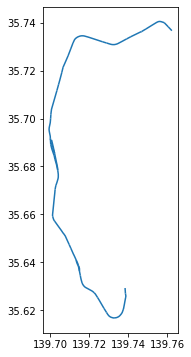

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
gdf_yamanote.plot(ax=ax)

## CSVの読み込み

In [ ]:
df = pd.read_csv('./data/kokyoshisetsu.csv', encoding='shift-jis')
df

,施設名,施設名(英語),カテゴリ,電話番号,郵便番号,住所,緯度,経度,説明(日本語),説明(英語),FAX番号,開所時間帯,開所時刻,閉所時刻,利用料金,画像URL,サムネイル画像URL,ホームページアドレス,創設日,創設者
0,品川区役所,Shinagawa City Office,区役所,03-3777-1111,140-0005,東京都品川区広町2-1-36,35.608837,139.73024,区役所,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,品川第一地域センター,Shinagawa Dai-ichi Community Ctr.,地域センター,03-3450-2000,140-0001,東京都品川区北品川3-11-16,35.616681,139.74008,地域センター,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,品川第二地域センター,Shinagawa Dai-ni Community Ctr.,地域センター,03-3472-2000,140-0004,東京都品川区南品川5-3-20,35.611373,139.74129,地域センター,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,大崎第一地域センター,Osaki Dai-ichi Community Ctr.,地域センター,03-3491-2000,141-0031,東京都品川区西五反田3-6-3,35.627776,139.71686,地域センター,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,大崎第二地域センター,Osaki Dai-ni Community Ctr.,地域センター,03-3492-2000,141-0032,東京都品川区大崎2-9-4,35.616945,139.72757,地域センター,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,なぎさ会館,Nagisa Funeral Hall,区民生活関連施設,03-5471-2700,140-0012,東京都品川区勝島3-1-3,35.596317,139.74173,葬祭施設,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
754,臨海斎場,NaN,区民生活関連施設,03-5755-2833,143-0001,東京都大田区東海1-3-1,35.585557,139.75282,葬祭施設,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755,品川区消費者センター,Consumers' Ctr.,区民生活関連施設,03-5718-7181,140-0014,東京都品川区大井1-14-1 大井1丁目共同ビル4階,35.607696,139.73146,消費生活相談,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
756,男女共同参画センター,Equality of Gender Ctr.,区民生活関連施設,03-5479−4104,140-0011,東京都品川区東大井5−18−1品川区立総合区民会館3階,35.606177,139.73584,男女共同参画,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.loc[:, '施設名':'経度']
df

,施設名,施設名(英語),カテゴリ,電話番号,郵便番号,住所,緯度,経度
0,品川区役所,Shinagawa City Office,区役所,03-3777-1111,140-0005,東京都品川区広町2-1-36,35.608837,139.73024
1,品川第一地域センター,Shinagawa Dai-ichi Community Ctr.,地域センター,03-3450-2000,140-0001,東京都品川区北品川3-11-16,35.616681,139.74008
2,品川第二地域センター,Shinagawa Dai-ni Community Ctr.,地域センター,03-3472-2000,140-0004,東京都品川区南品川5-3-20,35.611373,139.74129
3,大崎第一地域センター,Osaki Dai-ichi Community Ctr.,地域センター,03-3491-2000,141-0031,東京都品川区西五反田3-6-3,35.627776,139.71686
4,大崎第二地域センター,Osaki Dai-ni Community Ctr.,地域センター,03-3492-2000,141-0032,東京都品川区大崎2-9-4,35.616945,139.72757
...,...,...,...,...,...,...,...,...
753,なぎさ会館,Nagisa Funeral Hall,区民生活関連施設,03-5471-2700,140-0012,東京都品川区勝島3-1-3,35.596317,139.74173
754,臨海斎場,NaN,区民生活関連施設,03-5755-2833,143-0001,東京都大田区東海1-3-1,35.585557,139.75282
755,品川区消費者センター,Consumers' Ctr.,区民生活関連施設,03-5718-7181,140-0014,東京都品川区大井1-14-1 大井1丁目共同ビル4階,35.607696,139.73146
756,男女共同参画センター,Equality of Gender Ctr.,区民生活関連施設,03-5479−4104,140-0011,東京都品川区東大井5−18−1品川区立総合区民会館3階,35.606177,139.73584


In [ ]:
df.isna().any()

施設名        False
施設名(英語)     True
カテゴリ       False
電話番号        True
郵便番号       False
住所         False
緯度         False
経度         False
dtype: bool

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
geometry = gpd.points_from_xy(df['経度'], df['緯度'])

In [ ]:
geometry

<GeometryArray>
 ...
Length: 758, dtype: geometry

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=geometry)
gdf

,施設名,施設名(英語),カテゴリ,電話番号,郵便番号,住所,緯度,経度,geometry
0,品川区役所,Shinagawa City Office,区役所,03-3777-1111,140-0005,東京都品川区広町2-1-36,35.608837,139.73024,POINT (139.73024 35.60884)
1,品川第一地域センター,Shinagawa Dai-ichi Community Ctr.,地域センター,03-3450-2000,140-0001,東京都品川区北品川3-11-16,35.616681,139.74008,POINT (139.74008 35.61668)
2,品川第二地域センター,Shinagawa Dai-ni Community Ctr.,地域センター,03-3472-2000,140-0004,東京都品川区南品川5-3-20,35.611373,139.74129,POINT (139.74129 35.61137)
3,大崎第一地域センター,Osaki Dai-ichi Community Ctr.,地域センター,03-3491-2000,141-0031,東京都品川区西五反田3-6-3,35.627776,139.71686,POINT (139.71686 35.62778)
4,大崎第二地域センター,Osaki Dai-ni Community Ctr.,地域センター,03-3492-2000,141-0032,東京都品川区大崎2-9-4,35.616945,139.72757,POINT (139.72757 35.61695)
...,...,...,...,...,...,...,...,...,...
753,なぎさ会館,Nagisa Funeral Hall,区民生活関連施設,03-5471-2700,140-0012,東京都品川区勝島3-1-3,35.596317,139.74173,POINT (139.74173 35.59632)
754,臨海斎場,NaN,区民生活関連施設,03-5755-2833,143-0001,東京都大田区東海1-3-1,35.585557,139.75282,POINT (139.75282 35.58556)
755,品川区消費者センター,Consumers' Ctr.,区民生活関連施設,03-5718-7181,140-0014,東京都品川区大井1-14-1 大井1丁目共同ビル4階,35.607696,139.73146,POINT (139.73146 35.60770)
756,男女共同参画センター,Equality of Gender Ctr.,区民生活関連施設,03-5479−4104,140-0011,東京都品川区東大井5−18−1品川区立総合区民会館3階,35.606177,139.73584,POINT (139.73584 35.60618)


In [ ]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

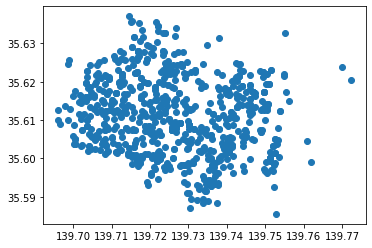

In [ ]:
gdf.plot()

## 練習〜行政区域を重ねてプロット

In [ ]:
gyosei = gpd.read_file('./data/gyosei/N03-17_13_170101.shp')
gyosei

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,千代田区,None,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,東京都,None,中央区,None,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,東京都,None,港区,None,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,東京都,None,港区,None,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,東京都,None,港区,None,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."
...,...,...,...,...,...,...
6205,東京都,None,None,所属未定地,None,"POLYGON ((139.84130 35.64702, 139.84131 35.647..."
6206,東京都,None,None,所属未定地,None,"POLYGON ((139.80438 35.60061, 139.80399 35.600..."
6207,東京都,None,None,所属未定地,None,"POLYGON ((139.81937 35.60899, 139.81923 35.608..."
6208,東京都,None,None,所属未定地,None,"POLYGON ((139.81009 35.61355, 139.81069 35.613..."


In [ ]:
gyosei_tmp = gyosei.dropna(subset=['N03_003'])
gyosei_tmp

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,千代田区,None,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,東京都,None,中央区,None,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,東京都,None,港区,None,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,東京都,None,港区,None,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,東京都,None,港区,None,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."
...,...,...,...,...,...,...
140,東京都,None,西多摩郡,瑞穂町,13303,"POLYGON ((139.35786 35.74464, 139.35776 35.744..."
141,東京都,None,西多摩郡,瑞穂町,13303,"POLYGON ((139.35000 35.79414, 139.35016 35.793..."
142,東京都,None,西多摩郡,日の出町,13305,"POLYGON ((139.19302 35.78875, 139.19307 35.788..."
143,東京都,None,西多摩郡,檜原村,13307,"POLYGON ((139.10611 35.77867, 139.10644 35.778..."


In [ ]:
gyosei_ku = gyosei_tmp[gyosei_tmp['N03_003'].str.contains('区')]
gyosei_ku

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,千代田区,None,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,東京都,None,中央区,None,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,東京都,None,港区,None,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,東京都,None,港区,None,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,東京都,None,港区,None,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."
...,...,...,...,...,...,...
107,東京都,None,葛飾区,None,13122,"POLYGON ((139.87626 35.79479, 139.87661 35.793..."
108,東京都,None,江戸川区,None,13123,"POLYGON ((139.86285 35.63532, 139.86299 35.635..."
109,東京都,None,江戸川区,None,13123,"POLYGON ((139.86380 35.63722, 139.86391 35.637..."
110,東京都,None,江戸川区,None,13123,"POLYGON ((139.85560 35.63856, 139.85563 35.638..."


<AxesSubplot:>

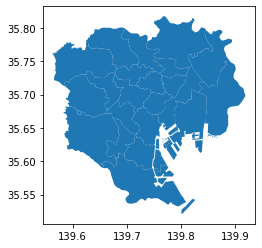

In [ ]:
gyosei_ku.plot()

<AxesSubplot:>

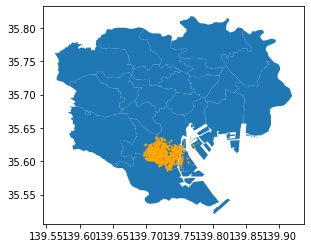

In [ ]:
ax = gyosei_ku.plot()
gdf.plot(ax=ax, color='orange', markersize=1)

In [ ]:
shinagawa = gyosei[gyosei['N03_003']=='品川区']
shinagawa

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
87,東京都,None,品川区,None,13109,"POLYGON ((139.75501 35.61771, 139.75507 35.617..."
88,東京都,None,品川区,None,13109,"POLYGON ((139.77231 35.62188, 139.77302 35.621..."
89,東京都,None,品川区,None,13109,"POLYGON ((139.75953 35.62500, 139.75966 35.621..."
90,東京都,None,品川区,None,13109,"POLYGON ((139.71943 35.64167, 139.71953 35.641..."


<AxesSubplot:>

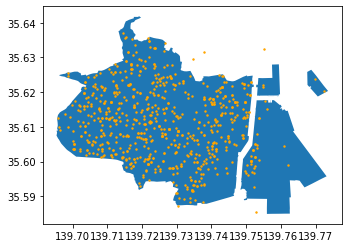

In [ ]:
ax = shinagawa.plot()
gdf.plot(ax=ax, color='orange', markersize=2)

## point, linestringなどのgeometryからlistへ変換

In [ ]:
gdf

,施設名,施設名(英語),カテゴリ,電話番号,郵便番号,住所,緯度,経度,geometry
0,品川区役所,Shinagawa City Office,区役所,03-3777-1111,140-0005,東京都品川区広町2-1-36,35.608837,139.73024,POINT (139.73024 35.60884)
1,品川第一地域センター,Shinagawa Dai-ichi Community Ctr.,地域センター,03-3450-2000,140-0001,東京都品川区北品川3-11-16,35.616681,139.74008,POINT (139.74008 35.61668)
2,品川第二地域センター,Shinagawa Dai-ni Community Ctr.,地域センター,03-3472-2000,140-0004,東京都品川区南品川5-3-20,35.611373,139.74129,POINT (139.74129 35.61137)
3,大崎第一地域センター,Osaki Dai-ichi Community Ctr.,地域センター,03-3491-2000,141-0031,東京都品川区西五反田3-6-3,35.627776,139.71686,POINT (139.71686 35.62778)
4,大崎第二地域センター,Osaki Dai-ni Community Ctr.,地域センター,03-3492-2000,141-0032,東京都品川区大崎2-9-4,35.616945,139.72757,POINT (139.72757 35.61695)
...,...,...,...,...,...,...,...,...,...
753,なぎさ会館,Nagisa Funeral Hall,区民生活関連施設,03-5471-2700,140-0012,東京都品川区勝島3-1-3,35.596317,139.74173,POINT (139.74173 35.59632)
754,臨海斎場,NaN,区民生活関連施設,03-5755-2833,143-0001,東京都大田区東海1-3-1,35.585557,139.75282,POINT (139.75282 35.58556)
755,品川区消費者センター,Consumers' Ctr.,区民生活関連施設,03-5718-7181,140-0014,東京都品川区大井1-14-1 大井1丁目共同ビル4階,35.607696,139.73146,POINT (139.73146 35.60770)
756,男女共同参画センター,Equality of Gender Ctr.,区民生活関連施設,03-5479−4104,140-0011,東京都品川区東大井5−18−1品川区立総合区民会館3階,35.606177,139.73584,POINT (139.73584 35.60618)


In [ ]:
#for
a = []
for index, row in gdf.iterrows():
    a.append(list(row['geometry'].coords))

In [ ]:
a

[[(139.73024, 35.608837)],
 [(139.74008, 35.616681)],
 [(139.74129, 35.611373)],
 [(139.71686, 35.627776)],
 [(139.72757, 35.616945)],
 [(139.73759, 35.596306)],
 [(139.73038, 35.604091)],
 [(139.72108, 35.597669)],
 [(139.70569, 35.619294)],
 [(139.70442, 35.611062)],
 [(139.71541, 35.613392)],
 [(139.70836, 35.60374)],
 [(139.72573, 35.6082)],
 [(139.75125, 35.600153)],
 [(139.7417, 35.600719)],
 [(139.70213, 35.614536)],
 [(139.73024, 35.608837)],
 [(139.73024, 35.608837)],
 [(139.74008, 35.616681)],
 [(139.74738, 35.617173)],
 [(139.74593, 35.61129)],
 [(139.72207, 35.634598)],
 [(139.71696, 35.628118)],
 [(139.71536, 35.635856)],
 [(139.73466, 35.593234)],
 [(139.74033, 35.6053)],
 [(139.75125, 35.600153)],
 [(139.73283, 35.60188)],
 [(139.72954, 35.602366)],
 [(139.72253, 35.59993)],
 [(139.71111, 35.617091)],
 [(139.70447, 35.624337)],
 [(139.69648, 35.609006)],
 [(139.71184, 35.612084)],
 [(139.71119, 35.601813)],
 [(139.71361, 35.603807)],
 [(139.71759, 35.615706)],
 [(139.722

In [ ]:
#lambda関数
b = gdf.apply(lambda row: list(row.geometry.coords) , axis=1)

In [ ]:
type(b)

pandas.core.series.Series

### LineString

In [ ]:
gdf = gpd.read_file('./data/train/N02-19_RailroadSection.geojson', encodinf='shift-jis')
gdf

,鉄道区分,事業者種別,路線名,運営会社,geometry
0,23,5,沖縄都市モノレール線,沖縄都市モノレール,"LINESTRING (127.67948 26.21454, 127.67970 26.2..."
1,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29139 40.33740, 141.29176 40.3..."
2,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.27554 40.23936, 141.27567 40.2..."
3,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.28659 40.26092, 141.28538 40.2..."
4,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29082 40.28615, 141.29089 40.2..."
...,...,...,...,...,...
22011,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.58522 35.48055, 139.58384 35.4..."
22012,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.56671 35.47802, 139.56433 35.4..."
22013,11,2,おおさか東線,西日本旅客鉄道,"LINESTRING (135.56227 34.68802, 135.56400 34.6..."
22014,11,2,東海道線,東日本旅客鉄道,"LINESTRING (139.66375 35.57335, 139.66382 35.5..."


In [ ]:
c = gdf.apply(lambda row: list(row.geometry.coords), axis=1)
c

0        [(127.67948, 26.21454), (127.6797, 26.21474), ...
1        [(141.29139, 40.3374), (141.29176, 40.33723), ...
2        [(141.27554, 40.23936), (141.27567, 40.23884),...
3           [(141.28659, 40.26092), (141.28538, 40.25874)]
4        [(141.29082, 40.28615), (141.29089, 40.28582),...
                               ...                        
22011    [(139.5852239, 35.48055395), (139.5838377, 35....
22012    [(139.56671043, 35.4780177), (139.56433123, 35...
22013    [(135.56227153, 34.68802013), (135.56400353, 3...
22014    [(139.66374739, 35.57334764), (139.66381594, 3...
22015    [(139.5870456, 35.48190453), (139.58646454, 35...
Length: 22016, dtype: object

# 座標系の変換

In [ ]:
shinagawa.crs

<Geographic 2D CRS: EPSG:6668>
Name: JGD2011
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf.to_crs(epsg=6668, inplace=True)

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:6668>
Name: JGD2011
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Japan - onshore and offshore.
- bounds: (122.38, 17.09, 157.65, 46.05)
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# オブジェクト間の距離

In [ ]:
a = Point(0,1)
b = Point(1,1)
a.distance(b)

1.0

In [ ]:
#緯度経度
tokyo_station = Point(139.767, 35.681)
tokyo_tower = Point(139.745, 35.659)

In [ ]:
tokyo_station.distance(tokyo_tower)

0.031112698372200896

In [ ]:
points_gdf = gpd.GeoDataFrame({"place":["tokyo_station", "tokyo_tower"], "geometry":[tokyo_station, tokyo_tower]}, crs="EPSG:4326")

In [ ]:
points_gdf

,place,geometry
0,tokyo_station,POINT (139.76700 35.68100)
1,tokyo_tower,POINT (139.74500 35.65900)


In [ ]:
points_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
points_gdf = points_gdf.to_crs("EPSG:6691")
points_gdf

,place,geometry
0,tokyo_station,POINT (388424.047 3949267.944)
1,tokyo_tower,POINT (386401.961 3946852.984)


In [ ]:
points_gdf.crs

<Projected CRS: EPSG:6691>
Name: JGD2011 / UTM zone 54N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Japan - between 138°E and 144°E, onshore and offshore.
- bounds: (138.0, 17.63, 144.0, 46.05)
Coordinate Operation:
- name: UTM zone 54N
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
dist = points_gdf.loc[0, 'geometry'].distance(points_gdf.loc[1, 'geometry'])
dist

3149.739674030552

## LineStringの長さ

In [ ]:
gdf = gpd.read_file('./data/train/N02-19_RailroadSection.geojson', encoding='shift-jis')
gdf

,鉄道区分,事業者種別,路線名,運営会社,geometry
0,23,5,沖縄都市モノレール線,沖縄都市モノレール,"LINESTRING (127.67948 26.21454, 127.67970 26.2..."
1,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29139 40.33740, 141.29176 40.3..."
2,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.27554 40.23936, 141.27567 40.2..."
3,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.28659 40.26092, 141.28538 40.2..."
4,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (141.29082 40.28615, 141.29089 40.2..."
...,...,...,...,...,...
22011,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.58522 35.48055, 139.58384 35.4..."
22012,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (139.56671 35.47802, 139.56433 35.4..."
22013,11,2,おおさか東線,西日本旅客鉄道,"LINESTRING (135.56227 34.68802, 135.56400 34.6..."
22014,11,2,東海道線,東日本旅客鉄道,"LINESTRING (139.66375 35.57335, 139.66382 35.5..."


In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
gdf.to_crs("EPSG:6691", inplace=True)
gdf

,鉄道区分,事業者種別,路線名,運営会社,geometry
0,23,5,沖縄都市モノレール線,沖縄都市モノレール,"LINESTRING (-838030.715 2968978.552, -838006.0..."
1,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (524750.129 4465247.151, 524781.618..."
2,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (523437.698 4454360.794, 523448.935..."
3,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (524369.888 4456756.830, 524267.776..."
4,12,5,いわて銀河鉄道線,アイジーアールいわて銀河鉄道,"LINESTRING (524720.394 4459558.423, 524726.464..."
...,...,...,...,...,...
22011,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (371654.361 3927256.635, 371526.968..."
22012,12,4,相鉄新横浜線,相模鉄道,"LINESTRING (369970.656 3926999.558, 369754.950..."
22013,11,2,おおさか東線,西日本旅客鉄道,"LINESTRING (1657.180 3851928.817, 1815.827 385..."
22014,11,2,東海道線,東日本旅客鉄道,"LINESTRING (378917.798 3937449.630, 378923.520..."


In [ ]:
gdf.geometry.length

0          702.930880
1          775.092289
2         1384.890797
3          262.939508
4          145.431353
             ...     
22011     1820.925134
22012      216.133641
22013      159.199305
22014    17046.055114
22015      223.426238
Length: 22016, dtype: float64

## Polygonの面積

In [ ]:
gyosei = gpd.read_file('./data/gyosei/N03-17_13_170101.shp')
gyosei

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,千代田区,None,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,東京都,None,中央区,None,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,東京都,None,港区,None,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,東京都,None,港区,None,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,東京都,None,港区,None,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."
...,...,...,...,...,...,...
6205,東京都,None,None,所属未定地,None,"POLYGON ((139.84130 35.64702, 139.84131 35.647..."
6206,東京都,None,None,所属未定地,None,"POLYGON ((139.80438 35.60061, 139.80399 35.600..."
6207,東京都,None,None,所属未定地,None,"POLYGON ((139.81937 35.60899, 139.81923 35.608..."
6208,東京都,None,None,所属未定地,None,"POLYGON ((139.81009 35.61355, 139.81069 35.613..."


In [ ]:
gyosei_tmp = gyosei.dropna(subset=['N03_003'])
gyosei_ku = gyosei_tmp[gyosei_tmp['N03_003'].str.contains('区')]
gyosei_ku

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,千代田区,None,13101,"POLYGON ((139.77287 35.70370, 139.77279 35.703..."
1,東京都,None,中央区,None,13102,"POLYGON ((139.78341 35.69645, 139.78459 35.696..."
2,東京都,None,港区,None,13103,"POLYGON ((139.77129 35.62841, 139.77128 35.628..."
3,東京都,None,港区,None,13103,"POLYGON ((139.76689 35.62774, 139.76718 35.627..."
4,東京都,None,港区,None,13103,"POLYGON ((139.77022 35.63199, 139.77046 35.631..."
...,...,...,...,...,...,...
107,東京都,None,葛飾区,None,13122,"POLYGON ((139.87626 35.79479, 139.87661 35.793..."
108,東京都,None,江戸川区,None,13123,"POLYGON ((139.86285 35.63532, 139.86299 35.635..."
109,東京都,None,江戸川区,None,13123,"POLYGON ((139.86380 35.63722, 139.86391 35.637..."
110,東京都,None,江戸川区,None,13123,"POLYGON ((139.85560 35.63856, 139.85563 35.638..."


In [ ]:
gyosei_ku.to_crs('EPSG:6691', inplace=True)

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
gyosei_ku

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,東京都,None,千代田区,None,13101,"POLYGON ((388986.351 3951779.351, 388979.007 3..."
1,東京都,None,中央区,None,13102,"POLYGON ((389929.934 3950962.991, 390036.389 3..."
2,東京都,None,港区,None,13103,"POLYGON ((388739.251 3943430.170, 388738.079 3..."
3,東京都,None,港区,None,13103,"POLYGON ((388340.040 3943360.850, 388365.686 3..."
4,東京都,None,港区,None,13103,"POLYGON ((388647.072 3943828.032, 388668.897 3..."
...,...,...,...,...,...,...
107,東京都,None,葛飾区,None,13122,"POLYGON ((398456.583 3961770.914, 398486.126 3..."
108,東京都,None,江戸川区,None,13123,"POLYGON ((397039.614 3944097.196, 397051.941 3..."
109,東京都,None,江戸川区,None,13123,"POLYGON ((397127.729 3944306.519, 397138.119 3..."
110,東京都,None,江戸川区,None,13123,"POLYGON ((396387.562 3944464.048, 396390.166 3..."


In [ ]:
gyosei_ku.geometry.area/10**6

0      11.503054
1      10.193586
2       0.000125
3       0.016122
4       0.017225
         ...    
107    34.860553
108     0.005018
109     0.053941
110     0.124551
111    48.643076
Length: 112, dtype: float64

## 集合論的な判定
### intersect, contains, touches
#### shapelyの場合

In [ ]:
a = LineString([(0,0), (5,5)])
b = LineString([(2,2), (10,2)])
c = Point(2.5, 2.5)
d = Point(1, 1)
e = Polygon([(0,0),(2,0),(2,2),(0,2)])
s = gpd.GeoSeries([a,b,c,d,e])
s

0        LINESTRING (0.00000 0.00000, 5.00000 5.00000)
1       LINESTRING (2.00000 2.00000, 10.00000 2.00000)
2                              POINT (2.50000 2.50000)
3                              POINT (1.00000 1.00000)
4    POLYGON ((0.00000 0.00000, 2.00000 0.00000, 2....
dtype: geometry

<AxesSubplot:>

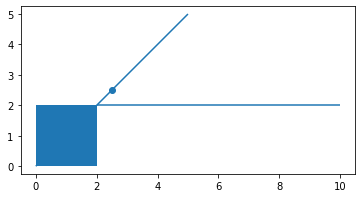

In [ ]:
s.plot()

In [ ]:
a.intersects(b)

True

In [ ]:
e.touches(c)

False

In [ ]:
e.touches(a)

False

In [ ]:
e.touches(b)

True

In [ ]:
e.contains(a)

False

In [ ]:
e.contains(d)

True

## 空間結合(Spatial Join) sjoin

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [ ]:
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


<AxesSubplot:>

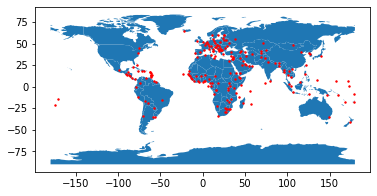

In [ ]:
ax = world.plot()
cities.plot(ax=ax, color='red', markersize=2)

In [ ]:
countries = world[['geometry', 'name']].rename(columns={'name':'country'})
countries

,geometry,country
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America
...,...,...
172,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia
173,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro
174,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo
175,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago


### intersects

In [ ]:
cities_with_country = cities.sjoin(countries, how='inner', predicate='intersects')
cities_with_country

,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141,Italy
1,San Marino,POINT (12.44177 43.93610),141,Italy
192,Rome,POINT (12.48131 41.89790),141,Italy
2,Vaduz,POINT (9.51667 47.13372),114,Austria
184,Vienna,POINT (16.36469 48.20196),114,Austria
...,...,...,...,...
195,Jakarta,POINT (106.82749 -6.17247),8,Indonesia
196,Bogota,POINT (-74.08529 4.59837),32,Colombia
197,Cairo,POINT (31.24802 30.05191),163,Egypt
198,Tokyo,POINT (139.74946 35.68696),155,Japan


In [ ]:
cities_with_country = cities.sjoin(countries, how='left', predicate='intersects')
cities_with_country

,name,geometry,index_right,country
0,Vatican City,POINT (12.45339 41.90328),141.0,Italy
1,San Marino,POINT (12.44177 43.93610),141.0,Italy
2,Vaduz,POINT (9.51667 47.13372),114.0,Austria
3,Luxembourg,POINT (6.13000 49.61166),128.0,Luxembourg
4,Palikir,POINT (158.14997 6.91664),NaN,NaN
...,...,...,...,...
197,Cairo,POINT (31.24802 30.05191),163.0,Egypt
198,Tokyo,POINT (139.74946 35.68696),155.0,Japan
199,Paris,POINT (2.33139 48.86864),43.0,France
200,Santiago,POINT (-70.66899 -33.44807),10.0,Chile


In [ ]:
cities_with_country = cities.sjoin(countries, how='right', predicate='intersects')
cities_with_country

,index_left,name,geometry,country
0,91.0,Suva,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji
1,144.0,Dar es Salaam,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania
2,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",W. Sahara
3,101.0,Ottawa,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada
4,186.0,"Washington, D.C.","MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America
...,...,...,...,...
172,102.0,Belgrade,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia
173,19.0,Podgorica,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro
174,21.0,Pristina,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo
175,12.0,Port-of-Spain,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago


In [ ]:
cities_with_country = cities.sjoin(countries, how='inner', predicate='contains')
cities_with_country

,name,geometry,index_right,country


In [ ]:
cities_with_country = countries.sjoin(cities, how='inner', predicate='contains')
cities_with_country

,geometry,country,index_right,name
0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,91,Suva
1,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,144,Dar es Salaam
3,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,101,Ottawa
4,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,186,"Washington, D.C."
5,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,96,Astana
...,...,...,...,...
172,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,102,Belgrade
173,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,19,Podgorica
174,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,21,Pristina
175,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,12,Port-of-Spain


## Nearest Point

In [ ]:
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

In [ ]:
me = Point(1,1)
pos1, pos2, pos3 = Point(0,1), Point(2,0), Point(2,2)

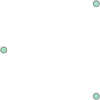

In [ ]:
points = MultiPoint([pos1,pos2,pos3])
points

In [ ]:
nearest_geoms = nearest_points(me, points)
nearest_geoms

(<shapely.geometry.point.Point at 0x7f260df660a0>,
 <shapely.geometry.point.Point at 0x7f260df66bb0>)

In [ ]:
print(nearest_geoms[0])

POINT (1 1)


In [ ]:
print(nearest_geoms[1])

POINT (0 1)


### GeoDataFrameへの適用〜一番近いタクシー
A, B, C点にいる人から見て、それぞれ一番近い位置にいるタクシーを抽出する

In [ ]:
me = gpd.GeoDataFrame({"person_name":["A", "B", "C"], "geometry":[Point(0,0), Point(5,0), Point(1,4)]})
me

,person_name,geometry
0,A,POINT (0.00000 0.00000)
1,B,POINT (5.00000 0.00000)
2,C,POINT (1.00000 4.00000)


In [ ]:
taxi = gpd.GeoDataFrame({"taxi_name":["taxi1", "taxi2", "taxi3", "taxi4"]
                         , "geometry":[Point(8,3), Point(-2,3), Point(0,3), Point(4,-3)]})
taxi

,taxi_name,geometry
0,taxi1,POINT (8.00000 3.00000)
1,taxi2,POINT (-2.00000 3.00000)
2,taxi3,POINT (0.00000 3.00000)
3,taxi4,POINT (4.00000 -3.00000)


In [ ]:
print(taxi.unary_union)

MULTIPOINT (-2 3, 0 3, 4 -3, 8 3)


In [ ]:
def get_nearest_value(row, gdf):
    other_points = gdf['geometry'].unary_union
    nearest_geoms = nearest_points(row['geometry'], other_points)
    return nearest_geoms[1]

In [ ]:
me['nearest_loc'] = me.apply(get_nearest_value, gdf=taxi, axis=1)

In [ ]:
me

,person_name,geometry,nearest_loc
0,A,POINT (0.00000 0.00000),POINT (0 3)
1,B,POINT (5.00000 0.00000),POINT (4 -3)
2,C,POINT (1.00000 4.00000),POINT (0 3)


## GeoDataFrameの集計 ~ dissolve

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

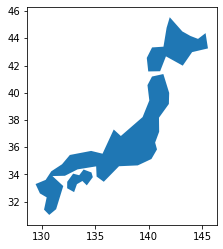

In [ ]:
world[world['name']=='Japan'].plot()

In [ ]:
continents = world.dissolve(by='continent', aggfunc='sum')
continents

,geometry,pop_est,gdp_md_est
continent,,,
Africa,"MULTIPOLYGON (((40.43725 -11.76171, 40.56081 -...",1219176238,6025295.50
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",4050,810.00
Asia,"MULTIPOLYGON (((120.29501 -10.25865, 118.96781...",4389144868,55434607.77
Europe,"MULTIPOLYGON (((-53.77852 2.37670, -54.08806 2...",746398461,25284877.00
North America,"MULTIPOLYGON (((-78.21494 7.51225, -78.42916 8...",573042112,23505137.00
Oceania,"MULTIPOLYGON (((171.94871 -41.51442, 172.09723...",36782844,1412885.00
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",140,16.00
South America,"MULTIPOLYGON (((-57.75000 -51.55000, -58.05000...",418540749,6377091.80


## ファイル出力

In [ ]:
world.to_file(driver='ESRI Shapefile', filename='test_shape_world.shp')

In [ ]:
world.to_file(driver='GeoJSON', filename='test_shape_world.geojson')